In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [3]:
print("Dataset Info:")
print(dataset.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [4]:
print(dataset.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [5]:
print(dataset.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [6]:
missing_values = dataset.isnull().sum()
print(missing_values)

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


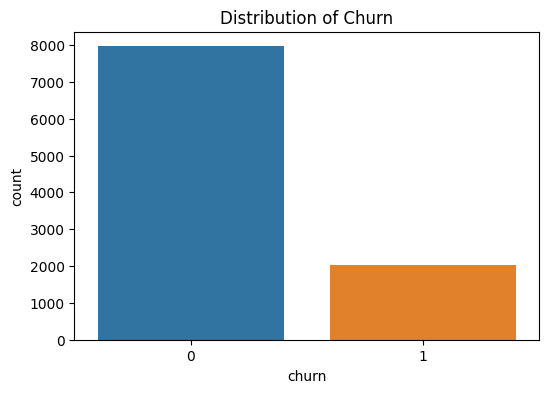

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=dataset)
plt.title('Distribution of Churn')
plt.show()

Text(0.5, 1.0, 'Distribution of Credit Score')

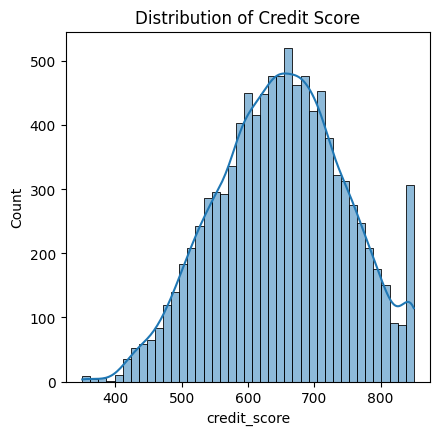

In [8]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
sns.histplot(dataset['credit_score'], kde=True)
plt.title('Distribution of Credit Score')

Text(0.5, 1.0, 'Distribution of Balance')

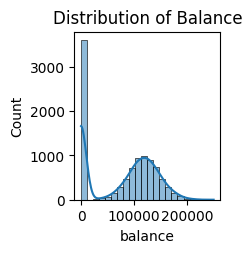

In [9]:
plt.subplot(2, 3, 4)
sns.histplot(dataset['balance'], kde=True)
plt.title('Distribution of Balance')


Text(0.5, 1.0, 'Distribution of Estimated Salary')

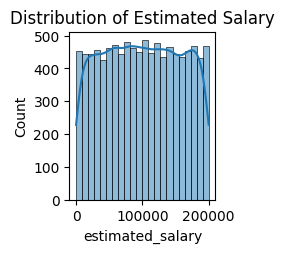

In [10]:
plt.subplot(2, 3, 6)
sns.histplot(dataset['estimated_salary'], kde=True)
plt.title('Distribution of Estimated Salary')

Text(0.5, 1.0, 'Credit Score vs. Churn')

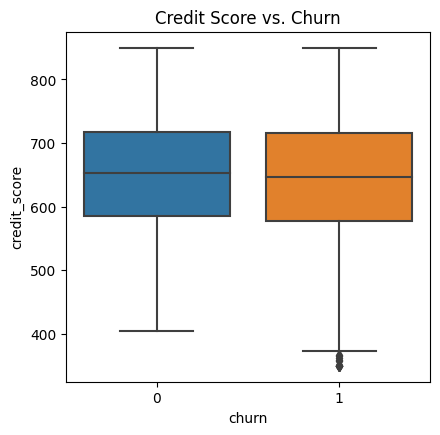

In [11]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='churn', y='credit_score', data=dataset)
plt.title('Credit Score vs. Churn')

Text(0.5, 1.0, 'Balance vs. Churn')

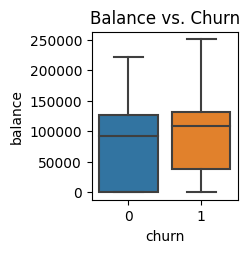

In [12]:
plt.subplot(2, 3, 4)
sns.boxplot(x='churn', y='balance', data=dataset)
plt.title('Balance vs. Churn')


In [13]:
# Example feature engineering for age groups
bins = [18, 35, 50, 100]
labels = ['young', 'adult', 'senior']
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)
